In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Physical devices:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.13.0
Physical devices: []


In [3]:
from tensorflow.keras.models import load_model

In [4]:
model_resnet=r"C:\Users\admin\Documents\mini_proj\model_resnet\model_resnet"

In [5]:
model=tf.saved_model.load(model_resnet)

In [6]:
infer = model.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)


((), {'inception_resnet_v2_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inception_resnet_v2_input')})
{'dense_1': TensorSpec(shape=(None, 200), dtype=tf.float32, name='dense_1')}


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [8]:
train_dir = r"C:\Users\admin\Documents\mini_proj\train\train"
valid_dir = r"C:\Users\admin\Documents\mini_proj\valid\valid"
test_dir = r"C:\Users\admin\Documents\mini_proj\test\test"


In [9]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test sets, only rescaling is needed
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical', 
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # Or 'binary'
    shuffle=False
)

Found 7045 images belonging to 200 classes.
Found 2369 images belonging to 200 classes.
Found 2374 images belonging to 200 classes.


In [10]:
class_labels=list(train_generator.class_indices.keys())

In [11]:
class_labels

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
test_data = np.concatenate([test_generator[i][0] for i in range(len(test_generator))])
y_true = test_generator.classes  # True labels

# Ensure test data is of type float32
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)

# Run inference
raw_predictions = infer(inception_resnet_v2_input=test_data)

# Process predictions
# The output key is 'dense_1', which contains class probabilities or logits
probabilities = raw_predictions['dense_1'].numpy()
y_pred = np.argmax(probabilities, axis=1)  # Convert probabilities to class indices

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate and print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Classification Report:
                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       0.62      0.42      0.50        12
              002.Laysan_Albatross       0.33      0.58      0.42        12
               003.Sooty_Albatross       0.40      0.33      0.36        12
             004.Groove_billed_Ani       0.78      0.58      0.67        12
                005.Crested_Auklet       1.00      0.56      0.71         9
                  006.Least_Auklet       1.00      0.78      0.88         9
               007.Parakeet_Auklet       0.77      0.91      0.83        11
             008.Rhinoceros_Auklet       0.50      0.30      0.37        10
              009.Brewer_Blackbird       0.33      0.17      0.22        12
          010.Red_winged_Blackbird       0.78      0.58      0.67        12
               011.Rusty_Blackbird       0.20      0.08      0.12        12
       012.Yellow_headed_Blackbird       0.88      0.58      0.7

In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path = r"C:\Users\admin\Documents\mini_proj\Minden_00527129-removebg-preview.png"
img = load_img(image_path, target_size=(224, 224))  # Resize the image
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output = infer(tf.constant(img_array))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class = np.argmax(output.numpy()) 
print(predicted_class) # Get the index of the highest probability
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


21
Predicted Class: 022.Chuck_will_Widow


In [19]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Loading an image for testing
image_path_2 = r"C:\Users\admin\Documents\mini_proj\train\train\002.Laysan_Albatross\Laysan_Albatross_0006_702.jpg"
img2 = load_img(image_path_2, target_size=(224, 224))  # Resize the image
img_array2 = img_to_array(img2) / 255.0  # Normalize pixel values to [0, 1]
img_array2 = np.expand_dims(img_array2, axis=0)  # Add batch dimension

# Get the serving signature (inference function)
infer = model.signatures["serving_default"]

# Perform prediction
input_name2 = list(infer.structured_input_signature[1].keys())[0]  # Get input tensor name
output2= infer(tf.constant(img_array2))[list(infer.structured_outputs.keys())[0]]  # Get output tensor


predicted_class2 = np.argmax(output2.numpy()) 
print(predicted_class2) # Get the index of the highest probability
predicted_label2 = class_labels[predicted_class2]

print(f"Predicted Class: {predicted_label2}")


1
Predicted Class: 002.Laysan_Albatross


In [20]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|██████████| 1000/1000 [01:11<00:00, 13.93it/s]


Predicted Class: 022.Chuck_will_Widow


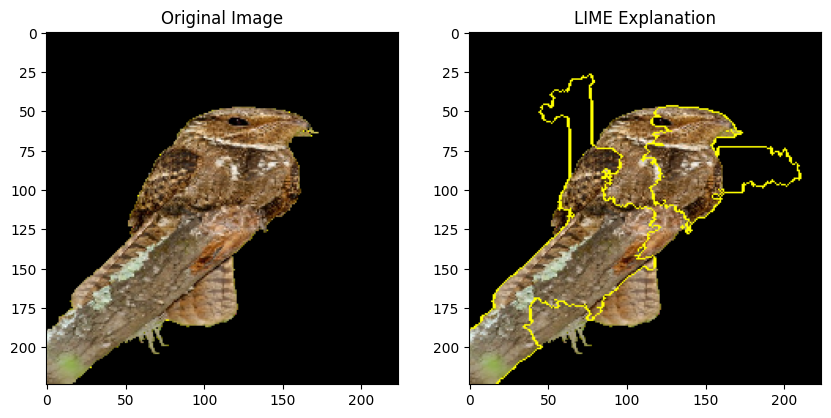

In [27]:
#lime for resnet model
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define class labels (adjust based on your dataset)
class_labels = list(test_generator.class_indices.keys())  # Or define manually

# Define image path
image_path3 = r"C:\Users\admin\Documents\mini_proj\Minden_00527129-removebg-preview.png"

# Load and preprocess the image
img3 = load_img(image_path3, target_size=(224, 224))  # Resize to model's input size
img_array3 = img_to_array(img3) / 255.0  # Normalize the image
img_array3 = np.expand_dims(img_array3, axis=0)  # Add batch dimension

# Wrap the model prediction to match LIME's expectations
def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](inception_resnet_v2_input=images)
    # Extract probabilities
    probabilities = predictions["dense_1"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    img_array3[0],                  # Single image (no batch dimension)
    predict_fn,                    # Wrapped prediction function
    top_labels=5,                  # Number of top labels to explain
    hide_color=0,                  # Background color to hide
    num_samples=1000               # Number of perturbations
)

# Get the top predicted class
pred3 = predict_fn(img_array3)  # Run prediction
predicted_class3 = np.argmax(pred3)
predicted_label_new3 = class_labels[predicted_class3]

# Display the predicted class
print(f"Predicted Class: {predicted_label_new3}")

# Get explanation image and mask
temp, mask = explanation.get_image_and_mask(
    label=predicted_class,         # Class to explain
    positive_only=True,            # Highlight only positive contributions
    hide_rest=False,               # Show the whole image
    num_features=5,                # Number of superpixels to highlight
    min_weight=0.05                # Minimum weight for a feature
)

# Plot the original image and explanation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img3)
plt.title("Original Image")

# LIME explanation
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()


In [ ]:
"C:\Users\admin\Documents\mini_proj\train\train\007.Parakeet_Auklet\Parakeet_Auklet_0030_795930.jpg"

100%|██████████| 1000/1000 [01:12<00:00, 13.73it/s]


Predicted Class: 013.Bobolink


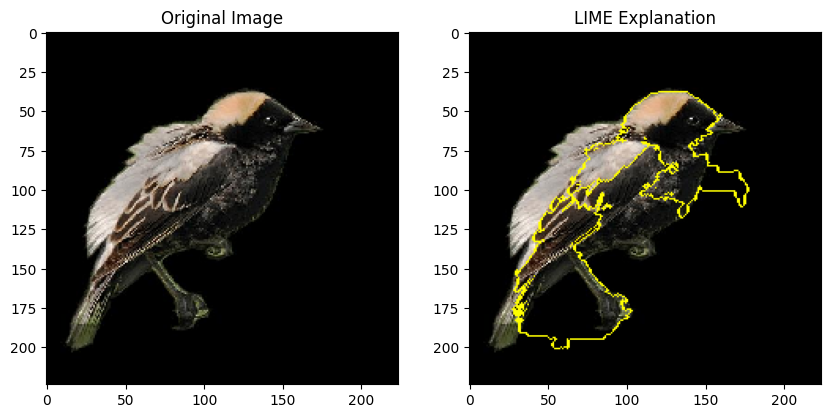

In [25]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define class labels (adjust based on your dataset)
class_labels = list(test_generator.class_indices.keys())  # Or define manually

# Define image path
image_path4 = r"C:\Users\admin\Documents\mini_proj\train\train\013.Bobolink\Bobolink_0040_9681.jpg"

# Load and preprocess the image
img4 = load_img(image_path4, target_size=(224, 224))  # Resize to model's input size
img_array4 = img_to_array(img4) / 255.0  # Normalize the image
img_array4 = np.expand_dims(img_array4, axis=0)  # Add batch dimension

# Wrap the model prediction to match LIME's expectations
def predict_fn(images):
    # Ensure images are of type float32
    images = tf.convert_to_tensor(images, dtype=tf.float32)
    # Run inference
    predictions = model.signatures["serving_default"](inception_resnet_v2_input=images)
    # Extract probabilities
    probabilities = predictions["dense_1"].numpy()
    return probabilities

# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction
explanation = explainer.explain_instance(
    img_array4[0],                  # Single image (no batch dimension)
    predict_fn,                    # Wrapped prediction function
    top_labels=5,                  # Number of top labels to explain
    hide_color=0,                  # Background color to hide
    num_samples=1000               # Number of perturbations
)

# Get the top predicted class
pred4 = predict_fn(img_array4)  # Run prediction
predicted_class4 = np.argmax(pred4)
predicted_label_new4 = class_labels[predicted_class4]

# Display the predicted class
print(f"Predicted Class: {predicted_label_new4}")

# Check if the predicted class is in the top labels
if predicted_class4 in explanation.top_labels:
    # Get explanation image and mask
    temp4, mask4 = explanation.get_image_and_mask(
        label=predicted_class4,         # Correct class to explain
        positive_only=True,             # Highlight only positive contributions
        hide_rest=False,                # Show the whole image
        num_features=5,                 # Number of superpixels to highlight
        min_weight=0.05                 # Minimum weight for a feature
    )

    # Plot the original image and explanation
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img4)
    plt.title("Original Image")

    # LIME explanation
    plt.subplot(1, 2, 2)
    plt.imshow(mark_boundaries(temp4, mask4))
    plt.title("LIME Explanation")
    plt.show()
else:
    print(f"Predicted class {predicted_label_new4} is not in the top labels list.")
